## Classificação de dados Fashion MNIST
Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas.<br/>
Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.1


### Importa e Carrega o conjunto de dados Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# train_images são 60.000 imagens de treinamento do tipo NumPy 28x28 com valores de pixel de 0 a 255
# train_labels são valores de classificação das imagens que vão de 0 a 9

# test_images são 10.000 imagens para testes

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# cria um nome para os valores de classificação
class_names = ['Camiseta', 'Calça', 'Suéter', 'Vestido', 'Casaco',
               'Sandalia', 'Camisa', 'Tênis', 'Bolsa', 'Botas']

In [4]:
train_images.shape

# Obs: 1 array de 3 dimensões
# 60000 arrays de 2 dimensões
# 28 arrays de 1 dimensão com 28 valores em cada

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

### Pré-processe os dados

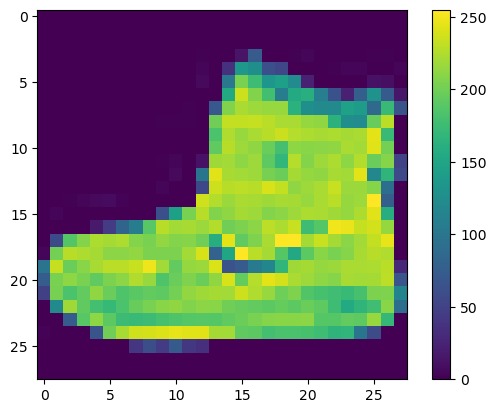

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Escalar valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural

In [7]:
train_images = train_images /255.0
test_images = test_images / 255.0

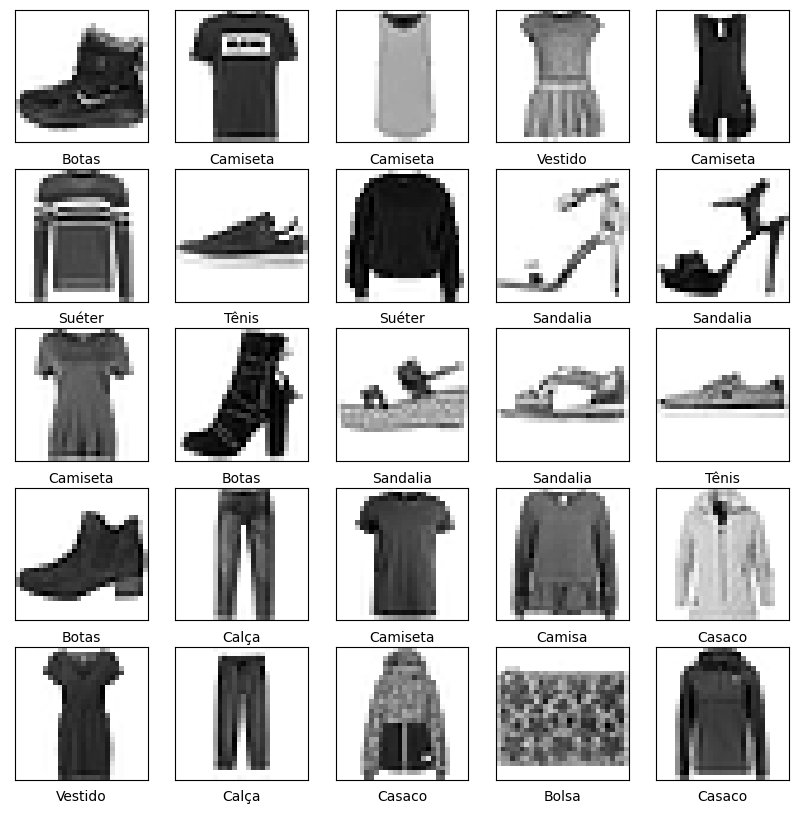

In [8]:
### Verifica os dados
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construindo o modelo
Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

## Montar as camadas
O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do deep learning consiste em encadear simples camadas. Muitas camadas, como tf.keras.layers.Dense, tem parâmetros que são aprendidos durante o treinamento.

---

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essas são camadas neurais densely connected, ou fully connected. A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camada é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### COMPILE O MODELO

- Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para a direção certa.
- Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
- Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### TREINA O MODELO

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4947 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3710 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3352 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2811 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2562 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2474 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

### Avalie a acurácia

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3479 - accuracy: 0.8777 - 636ms/epoch - 2ms/step

Test accuracy: 0.8776999711990356


Acabou que a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um overfitting. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

### Faça predições

In [13]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 1ms/step


array([4.9923655e-11, 3.6317932e-10, 7.8764356e-10, 2.0959585e-11,
       2.5760996e-09, 1.4110790e-02, 3.6506041e-08, 8.0423290e-03,
       9.9489315e-09, 9.7784686e-01], dtype=float32)

In [14]:
# O modelo disse que é 9, sendo uma bota
np.argmax(predictions[0])

9

In [15]:
# analisando o test_label 
test_labels[0]

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
    is_correct = "acertou"
  else:
    color = 'red'
    is_correct = "errou"
    
  x_label = f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})\n{is_correct}"
  plt.xlabel(x_label, color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

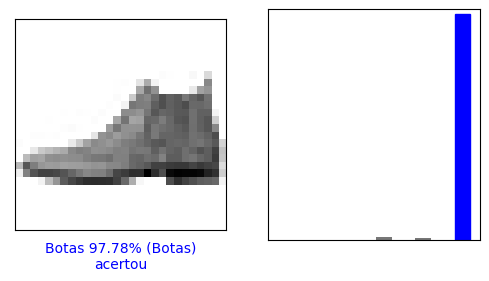

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)

plot_value_array(i, predictions,  test_labels)
plt.show()

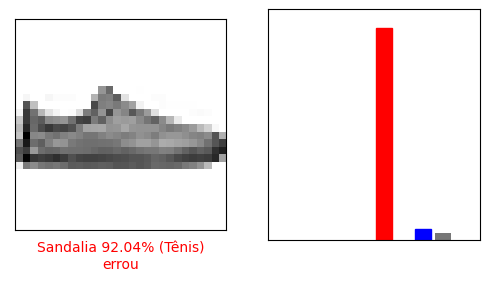

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

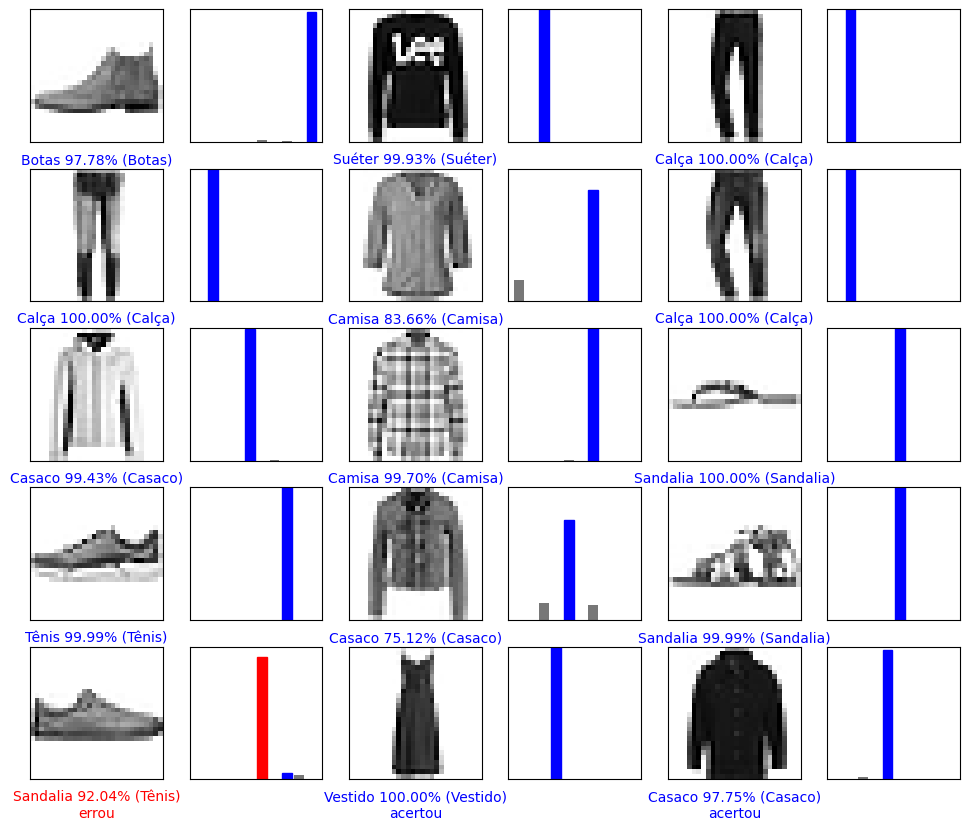

In [19]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### Fazer predições em um batch, ou coleções, de exemplos de uma vez.

In [20]:
# Pega uma imagem de teste do Dataset
img = test_images[0]

img.shape

(28, 28)

In [21]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
# Faz a predição da imagem com o modelo
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[4.9923468e-11 3.6317932e-10 7.8764201e-10 2.0959625e-11 2.5760996e-09
  1.4110783e-02 3.6505970e-08 8.0423364e-03 9.9489501e-09 9.7784686e-01]]


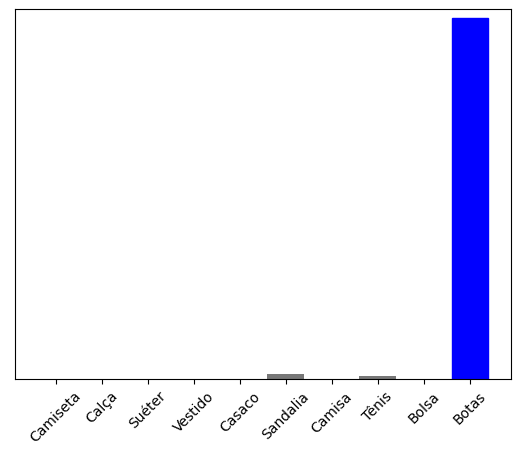

In [23]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)